   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

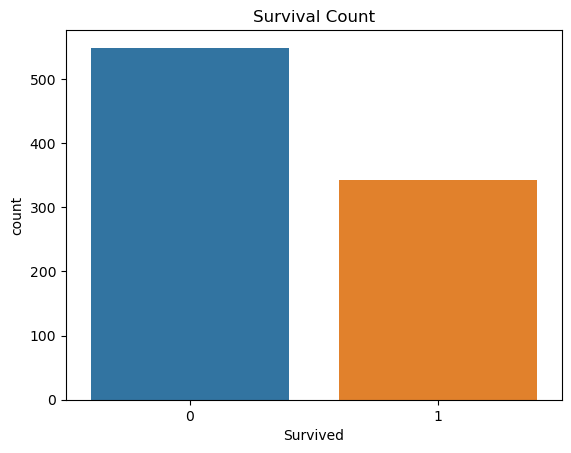

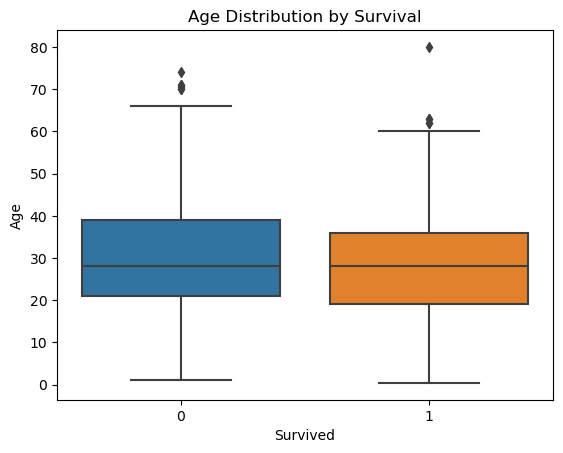

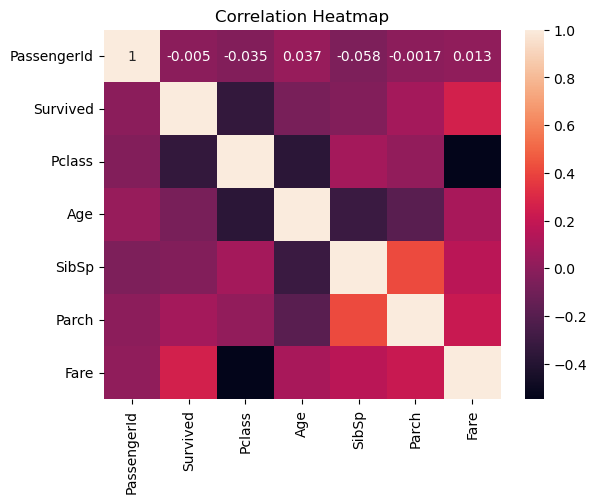

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

# Overview
print(train.head())
print(train.info())
print(train.describe(include='all'))

# Missing values
print(train.isnull().sum())

# Visualization
sns.countplot(x='Survived', data=train)
plt.title("Survival Count")
plt.show()

sns.boxplot(x='Survived', y='Age', data=train)
plt.title("Age Distribution by Survival")
plt.show()

sns.heatmap(train.select_dtypes(include=['float64', 'int64']).corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load datasets
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

# Save PassengerId for test prediction submission (if it exists)
test_ids = test['PassengerId'] if 'PassengerId' in test.columns else None

# Impute missing Age and Fare with median
age_imputer = SimpleImputer(strategy='median')
train['Age'] = age_imputer.fit_transform(train[['Age']])
test['Age'] = age_imputer.transform(test[['Age']])

fare_imputer = SimpleImputer(strategy='median')
if 'Fare' in test.columns:
    test['Fare'] = fare_imputer.fit_transform(test[['Fare']])

# Fill missing Embarked values with mode
if 'Embarked' in train.columns:
    train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns if present
drop_cols = ['Cabin', 'Ticket', 'Name', 'PassengerId']
train = train.drop(columns=[col for col in drop_cols if col in train.columns])
test = test.drop(columns=[col for col in drop_cols if col in test.columns])

# Label encode categorical columns
label_enc = LabelEncoder()
categorical_cols = ['Sex', 'Embarked']

for col in categorical_cols:
    if col in train.columns:
        train[col] = label_enc.fit_transform(train[col])
    if col in test.columns:
        test[col] = label_enc.transform(test[col])


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.8823680823680824


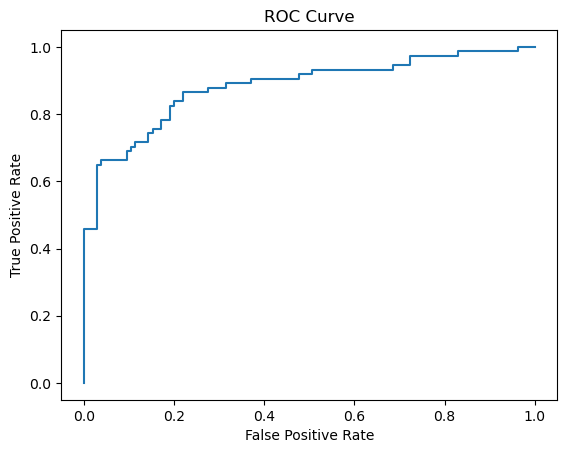

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [13]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coeff_df.sort_values(by='Coefficient', key=abs, ascending=False))

    Feature  Coefficient
1       Sex    -2.596994
0    Pclass    -0.930680
3     SibSp    -0.293905
6  Embarked    -0.218777
4     Parch    -0.111852
2       Age    -0.030433
5      Fare     0.002534


Larger absolute values = stronger influence on survival probability.
Positive coefficient → increases survival chance.
Negative coefficient → reduces survival chance.

1. Difference between precision and recall:

Precision: Correct positive predictions out of all predicted positives.

Precision=TP/(TP+FP)

Recall: Correct positive predictions out of all actual positives.

Recall=TP/(TP+FN)

Precision matters more when false positives are costly, recall when false negatives are.

2. What is cross-validation and why is it important?

Cross-validation splits the training data into multiple folds, training on some and validating on others.

Ensures the model performs well on unseen data and avoids overfitting.

Common: k-fold cross-validation.